© 2019 Suzy Beeler, Vahe Galstyan, & Muir Morrison. This work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT) 

This exercise was generated from a Jupyter notebook. You can download the notebook [here](bacterial_growth.ipynb).
___

# Objective 

In this tutorial, we will discuss how we can describe bacterial growth (i.e. exponential growth) mathematically. Given this mathematical model of how bacteria grow, we will then analyze images to determine the growth rate of a bacterial colony. For now, we will determine the growth rate value that best describes our data by fitting "by eye." Later in the bootcamp, we will learn more rigorous ways to determine which parameter value(s) best describe our data.

# Mathematically describing bacterial growth

Provided a nutrient-rich environment, bacteria will continually multiply, resulting in exponential growth which we can describe mathematically. Let's assume that the growth rate of bacteria is $\lambda$. If $N(t)$ is the number of bacteria at time $t$, after a time increment $\Delta t$, the number of bacteria will be

\begin{align}
N(t+\Delta t) = N(t) + \lambda \, N(t) \Delta t.
\end{align}

Taking the $\Delta t \rightarrow 0$ limit, we obtain the time evolution equation for N(t)

\begin{align}
\frac{N(t+\Delta t) - N(t)}{\Delta t} \approx \frac{\mathrm{d} N(t)}{\mathrm{d} t} = \lambda N(t).
\end{align}

Knowing the initial number of bacteria, $N_0$, the solution to the above ordinary differential equation will be

\begin{align}
N(t) = N_0 e^{\lambda t}.
\end{align}

The doubling time of bacteria, $\tau$, is also of interest. It's defined as the time it takes for a bacterium to multiply, i.e.

\begin{align}
N(t+\tau) = 2 N(t).
\end{align}

Substituting the solution for $N(t)$, we find

\begin{align}
N_0 e^{\lambda(t+\tau)} &= 2N_0 e^{\lambda t} \\
e^{\lambda \tau} &= 2 \\
\tau &= \frac{\ln(2)}{\lambda}.
\end{align}

Now that we have a mathematical description for how bacteria grow, we can analyze microscopy images of a bacterial colony over time to estimate the growth rate $\lambda$ and the doubling time $\tau$.

# Analysis of bacterial colony images

Whenever we write code, we first need to import all the relevant packages that we will be using, as done below.

In [1]:
# Import the necessary modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# For pretty plots
import seaborn as sns
rc={'lines.linewidth': 2, 'axes.labelsize': 14, 'axes.titlesize': 14, \
    'xtick.labelsize' : 14, 'ytick.labelsize' : 14}
sns.set(rc=rc)

# For bulk acquisition of filenames
import glob

# For importing bacterial images
import skimage.io

Now, let's use the microscopy images of a growing bacterial colony to estimate the rate of bacterial growth. In the `data/` folder you can see microscopy images taken in *phase contrast* and *fluorescence* methods in 5 minute intervals. The phase images are named `ecoli_phase_xx.tif`, and the fluorescence ones are named `ecoli_TRITC_xx.tif`. Let's begin by taking a look at one of the fluorescence images. 

In [2]:
# Read an example image
im = skimage.io.imread('./data/ecoli_growth/ecoli_TRITC_11.tif')

# Take a look at its contents
im

array([[205, 205, 205, ..., 205, 204, 203],
       [206, 206, 206, ..., 205, 205, 204],
       [207, 204, 207, ..., 205, 205, 205],
       ...,
       [205, 204, 204, ..., 205, 204, 205],
       [204, 204, 203, ..., 204, 204, 205],
       [204, 204, 204, ..., 205, 205, 205]], dtype=uint16)

Here we see that the image is just an array of integers. You might not be used to thinking of pictures in this way, but microscopy images in fact give us *quantitative* information, with each pixel in a 2D array being assigned a numerical value to describe the intensity, with larger numbers corresponding to brighter pixels. If we want to actually see the image (and not just the numerical values), we can call `plt.imshow()` on our image.

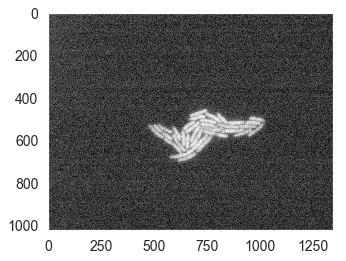

In [3]:
# Show the image in greyscale colormap
plt.imshow(im, cmap = plt.cm.Greys_r)

# Remove the grid that is shown by default
plt.grid(False)

As you can see, the image is stored as a 2d-array of integers. Since a single channel is present, we'll show the image in greyscale.

By eye, we see that it is easy to distinguish the colony (bright pixels) from the background (dark pixels). But how can we make the computer do the same? In order to compare the contents of different images, let's renormalize the numerical values of pixels to be from `0` to `1`, where `0` would correspond to the darkest pixel and `1` to the lightest.

In [4]:
# Renormalize the pixel values to the [0, 1] range
im_float = (im - np.min(im)) / (np.max(im) - np.min(im))

# Show the contents again
im_float

array([[0.23529412, 0.23529412, 0.23529412, ..., 0.23529412, 0.17647059,
        0.11764706],
       [0.29411765, 0.29411765, 0.29411765, ..., 0.23529412, 0.23529412,
        0.17647059],
       [0.35294118, 0.17647059, 0.35294118, ..., 0.23529412, 0.23529412,
        0.23529412],
       ...,
       [0.23529412, 0.17647059, 0.17647059, ..., 0.23529412, 0.17647059,
        0.23529412],
       [0.17647059, 0.17647059, 0.11764706, ..., 0.17647059, 0.17647059,
        0.23529412],
       [0.17647059, 0.17647059, 0.17647059, ..., 0.23529412, 0.23529412,
        0.23529412]])

Let's hover over the pixels and get a sense of what values the background and bacterial pixels have.

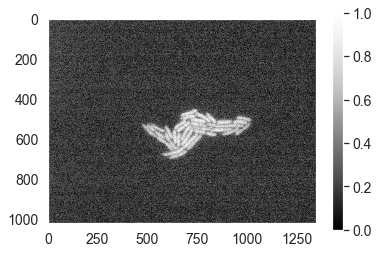

In [5]:
# Show the image in greyscale colormap
plt.imshow(im_float, cmap = plt.cm.Greys_r)
plt.colorbar()

# Remove the grid that is shown by default
plt.grid(False)

It seems like the background pixels have values around `0.1-0.3`, while the bacterial pixels have higher values of `0.6-0.8`. If we want the computer to be able to distinguish between bacteria and background (a process known as **segmenting** the image), we can use a **thresholding** approach, where we assign pixels above a certain value to `1` (indicating the pixel corresponds to bacteria) and pixels below a certain value to `0` (indicating the pixel corresponds to background). For these images, `0.4` seems like a good threshold. 

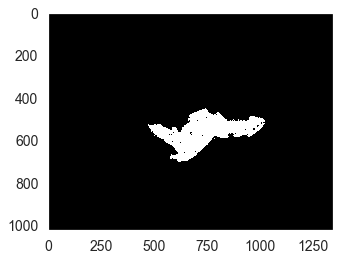

In [6]:
%matplotlib inline

# Threshold value
threshold = 0.4

# Apply the threshold and show the segmented image
plt.imshow(im_float > threshold, cmap = plt.cm.Greys_r)
plt.grid(False)

Looks like thresholding did a decent job in isolating the bacterial cells! Let's follow the same procedure for an image at a later frame to make sure our threshold value work well for multiple images.

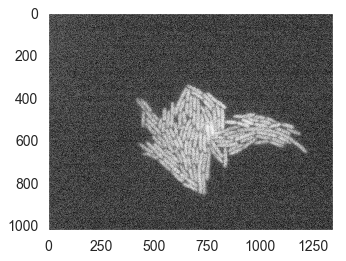

In [7]:
# Load the image
im = skimage.io.imread('./data/ecoli_growth/ecoli_TRITC_18.tif')

# Show the image
plt.imshow(im, cmap = plt.cm.Greys_r)
plt.grid(False)

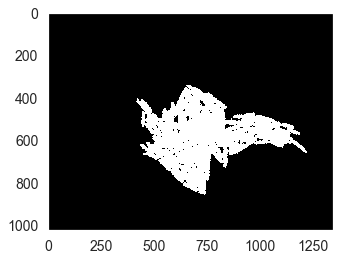

In [8]:
# Renormalize the image
im_float = (im - np.min(im))/(np.max(im) - np.min(im))

# Apply the threshold and show the segmented image
plt.imshow(im_float > threshold, cmap = plt.cm.Greys_r)
plt.grid(False)

This looks pretty good. Now that we've shown that our selected threshold works well for both early and late images in the sequence, we can now apply this thresholding approach to all of the images. To do this, we will be using the `glob.glob()` function, which will grab all the images with a given name (like `ecoli_TRITC_xx.tif`).

In [9]:
# Extract the names of all phase images
im_names = np.sort(glob.glob('./data/ecoli_growth/ecoli_TRITC_*.tif'))

# Take a look at some
im_names[0:5]

array(['./data/ecoli_growth/ecoli_TRITC_00.tif',
       './data/ecoli_growth/ecoli_TRITC_01.tif',
       './data/ecoli_growth/ecoli_TRITC_02.tif',
       './data/ecoli_growth/ecoli_TRITC_03.tif',
       './data/ecoli_growth/ecoli_TRITC_04.tif'], dtype='<U38')

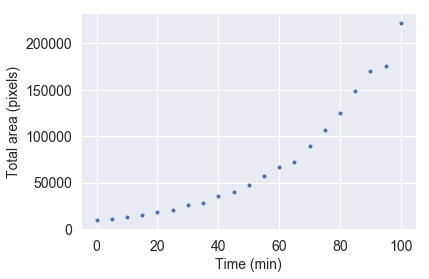

In [10]:
# Number of frames
n_frames = len(im_names)

# An array to store the bacterial areas
area_tot = np.zeros(n_frames)

# Extract the bacterial areas
for n in range(n_frames):
    
    # Read the frame
    im = skimage.io.imread(im_names[n])
    
    # Renormalize the image
    im_float = (im - np.min(im))/(np.max(im) - np.min(im))

    # Apply the threshold
    im_thresh = im_float > threshold
    
    # Save the area in our array
    area_tot[n] = np.sum(im_thresh)
    
# Time resolution in minutes
dt = 5

# Measurement times
times = dt * np.arange(n_frames)

# Plot the time dependence of the bacterial area
plt.plot(times, area_tot, '.')
plt.xlabel('Time (min)')
plt.ylabel('Total area (pixels)')
plt.show()

This in fact looks like an exponential growth curve! Since we are interested in the growth rate $\lambda$, let's rescale the areas so that in the first frame the area is normalized to `1`.

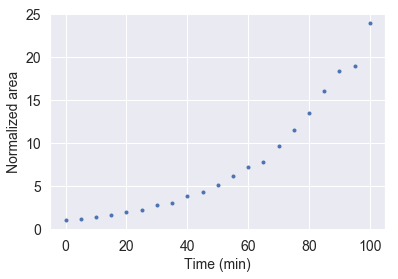

In [11]:
# Area normalization
area_tot_norm = area_tot / area_tot[0]

# Plot the normalized area
plt.plot(times, area_tot_norm, '.')
plt.xlabel('Time (min)')
plt.ylabel('Normalized area')
plt.show()

We need to find the value of the growth rate $\lambda$ which can best explain the curve above. To that end, let's introduce a fitting error function defined as

\begin{align}
\mathrm{Err}(\lambda) = \sum_{i=1}^{N} \left(f_i- \hat{f}_i(\lambda) \right)^2,
\end{align}

where the iteration takes place over each frame. Here $f_i$ represents the normalized area at the $i^{\text{th}}$ frame, and $\hat{f}_i(\lambda) = \exp(\lambda \, t_i)$ is the theoretical prediction of the fractional growth for a given value of the growth rate. Let's write a function that evaluates the error for a given choice of $\lambda$.

In [12]:
def err(norm_area, times, rate):
    """
    Returns the sum of the errors for the theory curve (given a the provided rate)
    versus the provided data (norm_area)
    """
    
    theory = np.exp(rate*times)
    
    return np.sum((theory - norm_area)**2)

To determine the growth rate of our bacterial colony, we should choose the value of $\lambda$ that minimizes the fitting error. Let's plot the error for different values of $\lambda$ and identify the optimal value. 

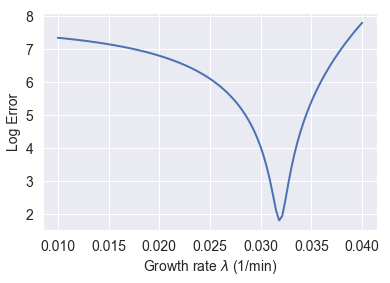

In [13]:
# Number of points to plot
n_points = 100

# Range of lambdas to test
lambdas = np.linspace(0.01, 0.04, n_points)

# Initilize an array of error
errors = np.zeros(n_points)

# For each lambda, call our err funtion to determine the amount of error
for i in range(n_points):
    errors[i] = np.log(err(area_tot_norm, times, lambdas[i]))
    
# Plot the erros over the values of lambda    
plt.plot(lambdas, errors)
plt.ylabel('Log Error')
plt.xlabel('Growth rate $\lambda$ (1/min)')
plt.show()

From a little trial and error, we find that the minimum error occurs somewhere between $\lambda = 0.02$ and $\lambda = 0.04$. The minimum seems to be around $0.032$, but we can find the exact value as shown below.

In [14]:
# Index of the optimal lambda
ind_optimal = np.where(errors == np.min(errors))

# Optimal lambda
lambda_fit = lambdas[ind_optimal]

# Show the optimal fit
print(lambda_fit)

[0.03181818]


The optimal fit is $\lambda \approx 0.03$ min$^{-1}$. It corresponds to a doubling time of $\tau \approx 23$ minutes, which is consistent with what we see with *E. coli* grown in the lab. In the final step, let's add the best growth curve on top of the experimental one to visually see the goodness of fit.

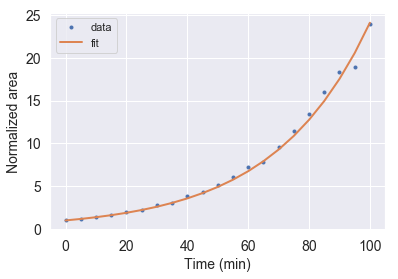

In [15]:
# Plot the normalized area
plt.plot(times, area_tot_norm, '.')
plt.plot(times, np.exp(lambda_fit*times))
plt.xlabel('Time (min)')
plt.ylabel('Normalized area')
plt.legend(['data','fit'])
plt.show()

### An alternative visualization

Sometimes it can be very useful when exploring a model to make plots that are _interactive_, such that you can play with model parameters in real time and see the response. Here we will give a taste of this using Panel, a wonderful new package that makes it relatively painless to construct interactive plots. Let's use it to see how the exponential growth curve varies as we change the growth rate, as another way to verify by eye the quality of our fit. In this case, we can create a slider widget which controls the growth rate, and the plot will automatically update in response. The version on the website is not interactive; you need to download and run the notebook live for it to work. To install panel and holoviews if you have not already, uncomment and run the following lines in a terminal.

In [16]:
# conda install holoviews
# conda install panel

In [17]:
import panel as pn
import holoviews as hv
hv.extension('matplotlib')
pn.extension()

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

First we define a Panel slider object, giving it minimum & maximum values, a step size, and a default value. To check that it behaves as expected, we can display it alone.

In [18]:
lam_slider = pn.widgets.FloatSlider(name="lambda", start=0.02, end=0.04, step=0.001, value=lambda_fit[0])
lam_slider

FloatSlider(end=0.04, name='lambda', start=0.02, step=0.001, value=0.03181818181818182)

Next let's see a basic Holoviews plot of our exponential growth curve. We're defining a function for the job in anticipation of feeding it to Panel below.

In [19]:
def plot_exp_fit(lam):
    t = np.linspace(0, 100, 200)
    y = np.exp(lam*t)
    return hv.Curve(data=(t, y), kdims=["time (min)"], vdims=["normalized area"])

Let's make a plot using the best fit value we inferred above.

:Curve   [time (min)]   (normalized area)
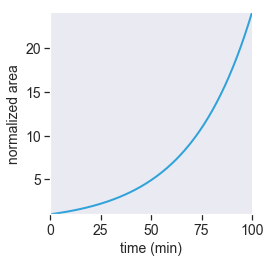

In [20]:
plot_exp_fit(lambda_fit[0])

Great, but we'd like to overlay the data with this. Holoviews makes it easy to overlay two plots with the `*` operator, and we can reuse the function we just wrote.

:Overlay
   .Curve.I  :Curve   [time (min)]   (normalized area)
   .Points.I :Points   [x,y]
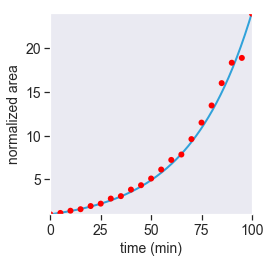

In [21]:
def plot_exp_fit_overlay(lam):
    data = hv.Points(data=(times, area_tot_norm)).opts(color='red')
    return plot_exp_fit(lam) * data
plot_exp_fit_overlay(lambda_fit[0])

To make the plot interactive, we precede the function with a panel _decorator_ which specifies which of the functions arguments. Under the hood, this lets Panel update the output of the function with the input of the slider.

Row
    [0] ParamFunction(function)
    [1] Spacer(width=15)
    [2] FloatSlider(end=0.04, name='lambda', start=0.02, step=0.001, value=0.03181818181818182)
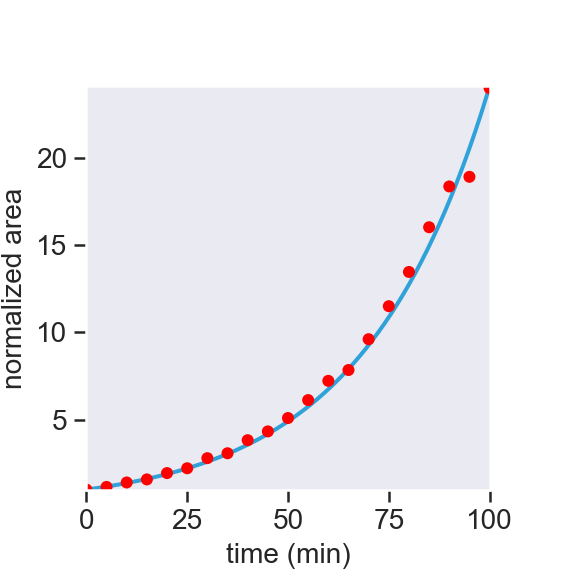

In [22]:
@pn.depends(lam_slider.param.value)
def plot_exp_fit_interac(lam):
    return plot_exp_fit_overlay(lam)

pn.Row(plot_exp_fit_interac, pn.Spacer(width=15), lam_slider)